# Utils

In [ ]:
import torch
from torchvision.transforms import v2
from PIL import Image
import matplotlib.pyplot as plt
from lib.data.metainfo import MetaInfo

def plot_images(images, size: int = 4):
    if isinstance(images, list):
        _, axes = plt.subplots(1, len(images), figsize=(size, size))
        for ax, image in zip(axes, images):
            ax.imshow(image.permute(1, 2, 0).detach().cpu().numpy())
            ax.axis("off")  # Turn off axis
        plt.show()
    else:
        plt.figure(figsize=(size, size))
        plt.imshow(images.permute(1, 2, 0).detach().cpu().numpy())
        plt.show()

# Different Sketch Types

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


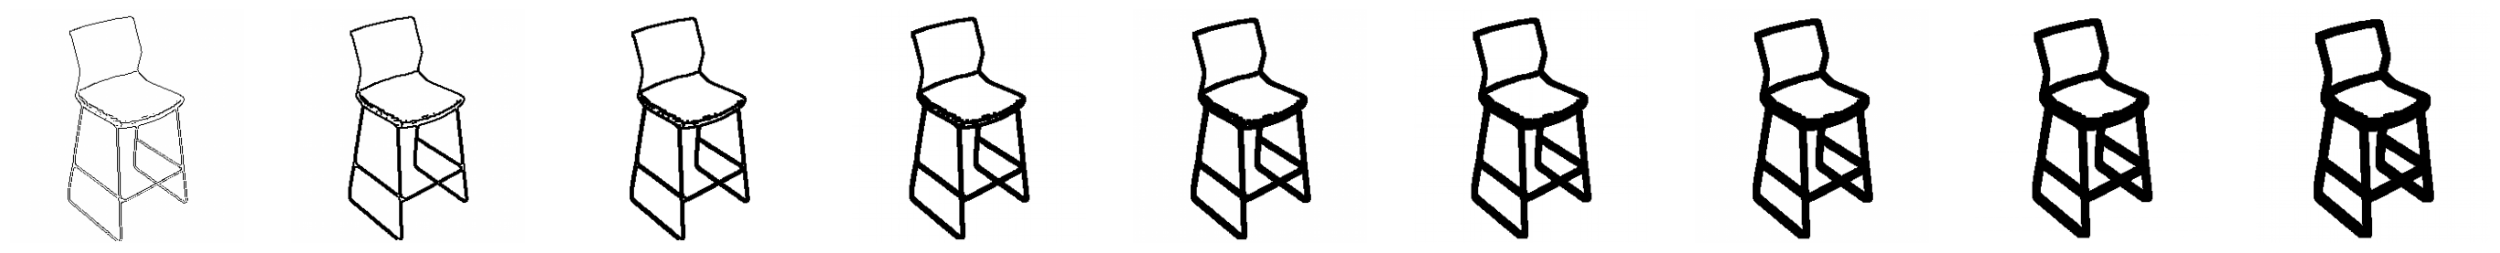

In [274]:
obj_id = 90
metainfo = MetaInfo(data_dir="/home/borth/sketch2shape/data/shapenet_chair_4096")
trans = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])
sketch = metainfo.load_sketch(metainfo.obj_ids[obj_id], "00011")
sketch = 1 - trans(sketch)

images = []
for kernel_size in range(1,10):
    conv = torch.nn.Conv2d(3, 3, kernel_size=kernel_size, padding="same", stride=(1,), bias=False)
    conv.weight = torch.nn.Parameter(torch.ones_like(conv.weight))
    _sketch = sketch
    _sketch = v2.functional.pad(sketch, padding=kernel_size+1)
    img = conv(_sketch)
    img = 1 - torch.min(img, torch.tensor(1))
    img = v2.functional.resize(img, (256, 256), antialias=True)
    images.append(img)

plot_images(images, size=32)

# Stack multiple sketches on top of each other

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


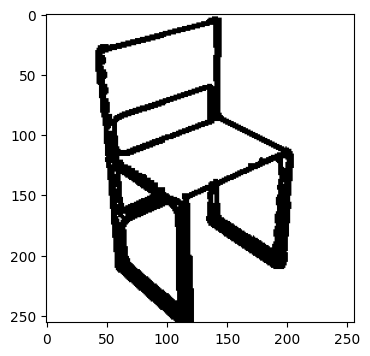

In [203]:
t = 4
overlaps = []
for degree, image in enumerate(images[1:4][::-1]):
    img = 1 - image
    overlaps.append(v2.functional.rotate(img, degree))
plot_images(1 - torch.stack(overlaps).sum(0))

# Sharpness

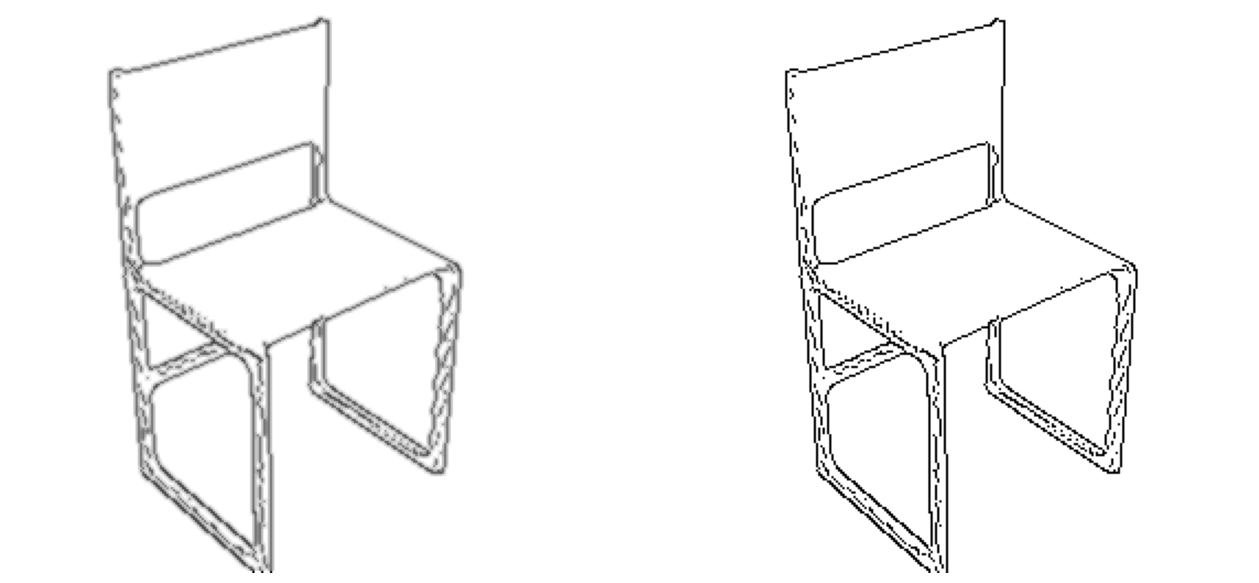

In [227]:
sharpness_images = [
    v2.functional.adjust_sharpness(images[0], 0),
    v2.functional.adjust_sharpness(images[0], 100),
]
plot_images(sharpness_images, size=16)

# Resize

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


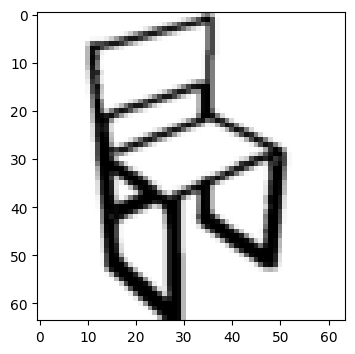

In [237]:
resized_image = v2.functional.resize(images[4], size=(64, 64), antialias=True)
plot_images(resized_image)

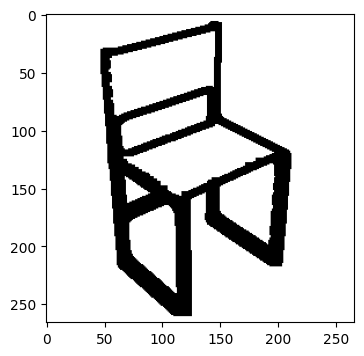

In [243]:
pad_img = v2.functional.pad(images[5], padding=5, fill=1.0)
plot_images(pad_img)